## DINOv2 시각화(테스트용)

In [23]:
from transformers import AutoImageProcessor, AutoModel
from PIL import Image
import requests
from train_vlm import QuIC360Dataset
from transformers import AutoProcessor, AutoTokenizer

dataset = QuIC360Dataset(
    csv_file="data/quic360/downtest.csv",
    image_processor= AutoProcessor.from_pretrained("facebook/dinov2-small",cache_dir='./.cache'),
    tokenizer=AutoTokenizer.from_pretrained("Qwen/Qwen3-0.6B"),
    image_size=[512, 512],
    max_length=128,
    do_crop=True,
    fov=90,
    overlap_ratio=0.5,
)
sample = dataset[0]
model = AutoModel.from_pretrained('facebook/dinov2-small',cache_dir='./.cache')


outputs = model(sample['pixel_values'])
last_hidden_states = outputs.last_hidden_state
last_hidden_states = last_hidden_states.cpu().detach().numpy()  

image_size: (1024, 2048)
[train] img_size=(1024, 2048)  do_crop=True
Input sequence:
<|im_start|>system
You are a helpful assistant. Describe this image.<|im_end|>
<|im_start|>user
location <image><image><|im_end|>
<|im_start|>assistant
<think>

</think>

A construction business that was operating in a dessert area, the company now looks to be abandon,   In the distance a crane stands watch over the business.<|im_end|>
<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|end

## 제안하는 SurroundBlip 시각화

In [ ]:
from src.models.surroundblip import SurroundBlip
from train_vlm import QuIC360Dataset
from transformers import AutoProcessor, AutoTokenizer

dataset = QuIC360Dataset(
    csv_file="data/quic360/downtest.csv",
    image_processor= AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b",cache_dir='./.cache'),
    tokenizer=AutoTokenizer.from_pretrained("Qwen/Qwen3-0.6B"),
    image_size=[224, 224],
    max_length=128,
    do_crop=True,
    fov=90,
    overlap_ratio=0.5,
)
sample = dataset[0]

model = SurroundBlip.from_pretrained("Salesforce/blip2-opt-2.7b", cache_dir='./.cache')
model = model.vision_model
model.eval()

last_hidden_states = model(sample['pixel_values']).last_hidden_state
last_hidden_states = last_hidden_states.cpu().detach().numpy()

image_size: (448, 896)
[train] img_size=(448, 896)  do_crop=True
Input sequence:
<|im_start|>system
You are a helpful assistant. Describe this image.<|im_end|>
<|im_start|>user
location <image><image><|im_end|>
<|im_start|>assistant
<think>

</think>

A construction business that was operating in a dessert area, the company now looks to be abandon,   In the distance a crane stands watch over the business.<|im_end|>
<|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endofte

/Users/seungwoo/anaconda3/envs/sur/lib/python3.12/site-packages/transformers/image_processing_utils.py:42: UserWarning: The following named arguments are not valid for `BlipImageProcessor.preprocess` and were ignored: 'do_center_crop'
  return self.preprocess(images, **kwargs)
Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]Error while downloading from https://cdn-lfs.hf.co/repos/57/7f/577ff0a2689dd13822d06b566f71563587c0983799dca82b88dcb054450c077d/536bd73b8f1de7d94f503b23fea2eaa4f7f3ea5f74f8f874fcb21d6df1555a19?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27model-00002-of-00002.safetensors%3B+filename%3D%22model-00002-of-00002.safetensors%22%3B&Expires=1748349753&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTc0ODM0OTc1M319LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5oZi5jby9yZXBvcy81Ny83Zi81NzdmZjBhMjY4OWRkMTM4MjJkMDZiNTY2ZjcxNTYzNTg3YzA5ODM3OTlkY2E4MmI4OGRjYjA1NDQ1MGMwNzdkLzUzNmJkNzNiOGYxZGU3ZDk0ZjUwM2IyM2ZlYTJlYWE0ZjdmM2VhN

In [ ]:
print(last_hidden_states.shape)  # Should print (batch_size, sequence_length, hidden_size)

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

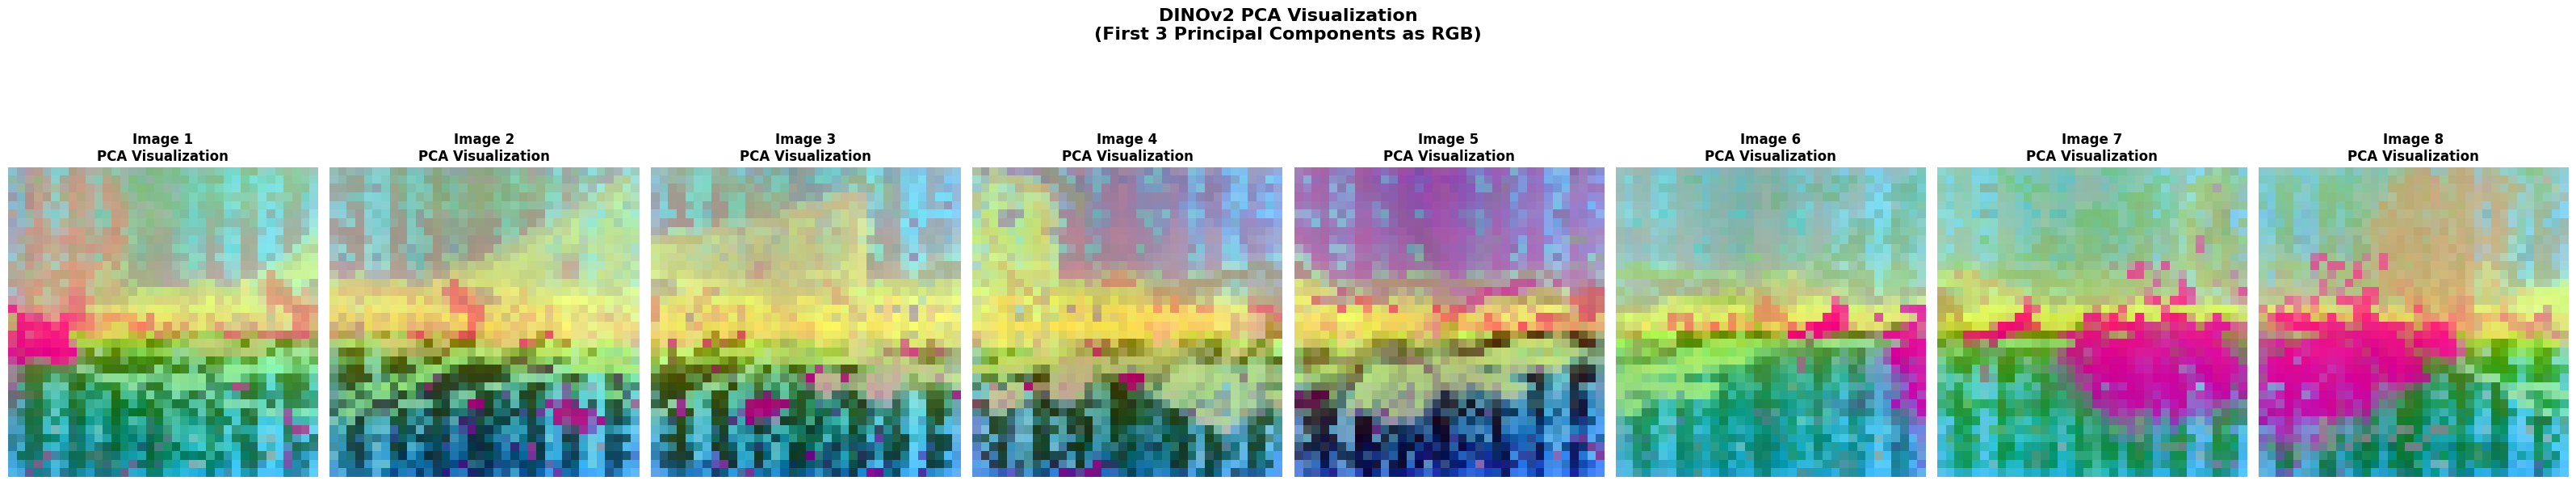


=== PCA 분석 결과 ===
주성분 1 설명 분산: 15.93%
주성분 2 설명 분산: 9.46%
주성분 3 설명 분산: 8.30%
총 설명 분산: 33.69%


"\n\n\n# 예제 2: 원본 이미지와 함께 비교\ncompare_images_pca(\n    hidden_states_list,\n    original_images=[img1, img2, img3, img4],  # PIL Images or numpy arrays\n    titles=['Corgi', 'Shiba', 'Retriever', 'Bulldog'],\n    save_path='comparison_viz.png'\n)\n\n# 예제 3: 단순 PCA 수행만\npca_rgb_list, pca_model = dinov2_multiple_pca_visualization(hidden_states_list)\n\n# 개별 결과 확인\nfor i, pca_rgb in enumerate(pca_rgb_list):\n    plt.figure(figsize=(6, 6))\n    plt.imshow(pca_rgb)\n    plt.title(f'Image {i+1} PCA Visualization')\n    plt.axis('off')\n    plt.show()\n"

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

def dinov2_multiple_pca_visualization(hidden_states_list, remove_cls_token=True, use_background_removal=True):
    """
    여러 이미지의 DINOv2 hidden states에서 공통 PCA 기반 RGB 시각화 생성
    
    Args:
        hidden_states_list (list): Hidden states 리스트 
                                  각 원소는 [seq_len, hidden_dim] 또는 [batch_size, seq_len, hidden_dim]
        remove_cls_token (bool): CLS 토큰 제거 여부
        use_background_removal (bool): 배경 제거 적용 여부
        
    Returns:
        list: RGB 시각화 이미지들의 리스트 [patch_h, patch_w, 3]
    """
    
    # 1. 모든 hidden states 전처리
    all_patch_tokens = []
    processed_tokens_list = []
    
    for hidden_states in hidden_states_list:
        # 배치 차원 처리
        if hidden_states.ndim == 3:
            hidden_states = hidden_states[0]
        
        # CLS 토큰 제거
        if remove_cls_token:
            patch_tokens = hidden_states[1:]
        else:
            patch_tokens = hidden_states
        
        processed_tokens_list.append(patch_tokens)
        all_patch_tokens.append(patch_tokens)
    
    # 2. 모든 패치 토큰 결합 (공통 PCA를 위해)
    combined_tokens = np.vstack(all_patch_tokens)
    
    # 3. 배경 제거 (선택적)
    if use_background_removal:
        # 1차 PCA로 배경/전경 분리
        pca_bg = PCA(n_components=1)
        bg_component = pca_bg.fit_transform(combined_tokens)
        
        # 경험적 임계값으로 전경 마스크 생성
        foreground_mask = bg_component.flatten() > 0.6
        
        if np.sum(foreground_mask) > 0:
            foreground_tokens = combined_tokens[foreground_mask]
        else:
            foreground_tokens = combined_tokens
    else:
        foreground_tokens = combined_tokens
    
    # 4. 공통 PCA 모델 학습 (첫 3개 성분)
    pca_semantic = PCA(n_components=3)
    pca_semantic.fit(foreground_tokens)
    
    # 5. 각 이미지별로 PCA 변환 및 RGB 시각화 생성
    pca_rgb_list = []
    
    for patch_tokens in processed_tokens_list:
        # 공통 PCA 모델로 변환
        semantic_features = pca_semantic.transform(patch_tokens)
        
        # RGB 정규화 [0, 1]
        rgb_features = np.zeros_like(semantic_features)
        for i in range(3):
            component = semantic_features[:, i]
            min_val, max_val = component.min(), component.max()
            if max_val != min_val:
                rgb_features[:, i] = (component - min_val) / (max_val - min_val)
            else:
                rgb_features[:, i] = 0.5
        
        # 패치 격자로 재구성
        num_patches = len(patch_tokens)
        patch_size = int(np.sqrt(num_patches))
        
        pca_rgb = rgb_features.reshape(patch_size, patch_size, 3)
        pca_rgb_list.append(pca_rgb)
    
    return pca_rgb_list, pca_semantic

def visualize_multiple_pca_results(hidden_states_list, titles=None, save_path=None, figsize=None):
    """
    여러 이미지의 PCA 결과를 동시에 시각화 (DINOv2 논문 Figure 1 스타일)
    
    Args:
        hidden_states_list (list): Hidden states 리스트
        titles (list, optional): 각 이미지의 제목
        save_path (str, optional): 저장 경로
        figsize (tuple, optional): 그림 크기
        
    Returns:
        tuple: (pca_rgb_list, pca_model)
    """
    
    num_images = len(hidden_states_list)
    
    # 기본 설정
    if titles is None:
        titles = [f'Image {i+1}' for i in range(num_images)]
    
    if figsize is None:
        figsize = (4 * num_images, 8)
    
    # PCA 수행
    pca_rgb_list, pca_model = dinov2_multiple_pca_visualization(hidden_states_list)
    
    # 시각화
    fig, axes = plt.subplots(1, num_images, figsize=figsize)
    
    # 단일 이미지인 경우 axes를 리스트로 변환
    if num_images == 1:
        axes = [axes]
    
    for i, (pca_rgb, title) in enumerate(zip(pca_rgb_list, titles)):
        axes[i].imshow(pca_rgb)
        axes[i].set_title(f'{title}\nPCA Visualization', fontsize=12, fontweight='bold')
        axes[i].axis('off')
    
    plt.suptitle('DINOv2 PCA Visualization\n(First 3 Principal Components as RGB)', 
                 fontsize=16, fontweight='bold', y=0.95)
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"시각화 저장: {save_path}")
    
    plt.show()
    
    # PCA 분석 정보 출력
    explained_variance = pca_model.explained_variance_ratio_
    print(f"\n=== PCA 분석 결과 ===")
    print(f"주성분 1 설명 분산: {explained_variance[0]:.2%}")
    print(f"주성분 2 설명 분산: {explained_variance[1]:.2%}")
    print(f"주성분 3 설명 분산: {explained_variance[2]:.2%}")
    print(f"총 설명 분산: {np.sum(explained_variance):.2%}")
    
    return pca_rgb_list, pca_model

def compare_images_pca(hidden_states_list, original_images=None, titles=None, save_path=None):
    """
    원본 이미지와 PCA 시각화를 함께 비교 표시
    
    Args:
        hidden_states_list (list): Hidden states 리스트
        original_images (list, optional): 원본 이미지들 (PIL Image 또는 numpy array)
        titles (list, optional): 각 이미지의 제목
        save_path (str, optional): 저장 경로
    """
    
    num_images = len(hidden_states_list)
    
    if titles is None:
        titles = [f'Image {i+1}' for i in range(num_images)]
    
    # PCA 수행
    pca_rgb_list, pca_model = dinov2_multiple_pca_visualization(hidden_states_list)
    
    # 원본 이미지가 있는 경우 2행으로, 없는 경우 1행으로 구성
    if original_images is not None:
        fig, axes = plt.subplots(2, num_images, figsize=(4 * num_images, 8))
        
        # 단일 이미지인 경우 처리
        if num_images == 1:
            axes = axes.reshape(2, 1)
        
        # 원본 이미지 표시
        for i, (orig_img, title) in enumerate(zip(original_images, titles)):
            axes[0, i].imshow(orig_img)
            axes[0, i].set_title(f'{title}\nOriginal', fontsize=12)
            axes[0, i].axis('off')
        
        # PCA 시각화 표시
        for i, (pca_rgb, title) in enumerate(zip(pca_rgb_list, titles)):
            axes[1, i].imshow(pca_rgb)
            axes[1, i].set_title(f'{title}\nPCA Visualization', fontsize=12)
            axes[1, i].axis('off')
    
    else:
        # PCA 시각화만 표시
        fig, axes = plt.subplots(1, num_images, figsize=(4 * num_images, 4))
        
        if num_images == 1:
            axes = [axes]
        
        for i, (pca_rgb, title) in enumerate(zip(pca_rgb_list, titles)):
            axes[i].imshow(pca_rgb)
            axes[i].set_title(f'{title}\nPCA Visualization', fontsize=12, fontweight='bold')
            axes[i].axis('off')
    
    plt.suptitle('DINOv2 Semantic Feature Visualization', fontsize=16, fontweight='bold')
    plt.tight_layout()
    
    if save_path:
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print(f"비교 시각화 저장: {save_path}")
    
    plt.show()
    
    return pca_rgb_list, pca_model

# 예제 1: 기본 여러 이미지 PCA 시각화

hidden_states_list = last_hidden_states
pca_results, pca_model = visualize_multiple_pca_results(
    hidden_states_list, 
)

# 사용 예제들
"""


# 예제 2: 원본 이미지와 함께 비교
compare_images_pca(
    hidden_states_list,
    original_images=[img1, img2, img3, img4],  # PIL Images or numpy arrays
    titles=['Corgi', 'Shiba', 'Retriever', 'Bulldog'],
    save_path='comparison_viz.png'
)

# 예제 3: 단순 PCA 수행만
pca_rgb_list, pca_model = dinov2_multiple_pca_visualization(hidden_states_list)

# 개별 결과 확인
for i, pca_rgb in enumerate(pca_rgb_list):
    plt.figure(figsize=(6, 6))
    plt.imshow(pca_rgb)
    plt.title(f'Image {i+1} PCA Visualization')
    plt.axis('off')
    plt.show()
"""

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from scipy import stats
import cv2

class DINOv2HiddenStateAnalyzer:
    """
    DINOv2의 last_hidden_states에 대한 PCA 기반 시각화 및 의미적 해석 클래스
    
    논문에서 제시된 방법론에 따라 패치 특징의 주성분 분석을 수행하고,
    의미적 해석을 위한 다양한 분석 도구를 제공합니다.
    """
    
    def __init__(self, background_threshold=0.6):
        """
        Args:
            background_threshold (float): 배경/전경 분리를 위한 임계값
        """
        self.background_threshold = background_threshold
        self.pca_bg = None
        self.pca_semantic = None
        self.scaler = None
        
    def preprocess_hidden_states(self, hidden_states, remove_cls_token=True):
        """
        Hidden states 전처리 수행
        
        Args:
            hidden_states (np.ndarray): [batch_size, seq_len, hidden_dim] 또는 [seq_len, hidden_dim]
            remove_cls_token (bool): CLS 토큰 제거 여부
            
        Returns:
            np.ndarray: 전처리된 패치 토큰 [num_patches, hidden_dim]
        """
        if hidden_states.ndim == 3:
            # 배치 차원이 있는 경우 첫 번째 샘플 사용
            hidden_states = hidden_states[0]
        
        if remove_cls_token:
            # CLS 토큰 제거 (첫 번째 토큰)
            patch_tokens = hidden_states[1:]
        else:
            patch_tokens = hidden_states
            
        return patch_tokens
    
    def compute_background_foreground_separation(self, patch_tokens):
        """
        배경과 전경을 분리하기 위한 1차 PCA 수행
        
        Args:
            patch_tokens (np.ndarray): 패치 토큰 [num_patches, hidden_dim]
            
        Returns:
            tuple: (foreground_mask, background_component)
        """
        # 1차 PCA로 배경/전경 분리
        self.pca_bg = PCA(n_components=1, random_state=42)
        background_component = self.pca_bg.fit_transform(patch_tokens)
        
        # 임계값 기반 마스크 생성
        bg_scores = background_component.flatten()
        foreground_mask = bg_scores > self.background_threshold
        
        print(f"전경 패치 비율: {np.sum(foreground_mask) / len(foreground_mask):.2%}")
        
        return foreground_mask, background_component
    
    def compute_semantic_pca(self, patch_tokens, foreground_mask=None, n_components=3):
        """
        의미적 특징 추출을 위한 PCA 수행
        
        Args:
            patch_tokens (np.ndarray): 패치 토큰
            foreground_mask (np.ndarray, optional): 전경 마스크
            n_components (int): PCA 성분 수
            
        Returns:
            np.ndarray: PCA 변환된 특징 [num_patches, n_components]
        """
        if foreground_mask is not None:
            # 전경 패치만 사용하여 PCA 학습
            foreground_tokens = patch_tokens[foreground_mask]
            if len(foreground_tokens) == 0:
                print("경고: 전경 패치가 감지되지 않아 전체 패치를 사용합니다.")
                foreground_tokens = patch_tokens
        else:
            foreground_tokens = patch_tokens
        
        # PCA 학습 및 변환
        self.pca_semantic = PCA(n_components=n_components, random_state=42)
        self.pca_semantic.fit(foreground_tokens)
        
        # 전체 패치에 대해 변환 수행
        semantic_features = self.pca_semantic.transform(patch_tokens)
        
        return semantic_features
    
    def create_pca_rgb_visualization(self, semantic_features, image_size=None):
        """
        PCA 특징을 RGB 이미지로 변환
        
        Args:
            semantic_features (np.ndarray): PCA 변환된 특징 [num_patches, 3]
            image_size (tuple, optional): 원본 이미지 크기 (height, width)
            
        Returns:
            np.ndarray: RGB 시각화 이미지 [patch_h, patch_w, 3]
        """
        # 첫 3개 성분만 사용
        rgb_features = semantic_features[:, :3]
        
        # 각 성분을 [0, 1] 범위로 정규화
        rgb_normalized = np.zeros_like(rgb_features)
        for i in range(3):
            component = rgb_features[:, i]
            min_val, max_val = component.min(), component.max()
            if max_val != min_val:
                rgb_normalized[:, i] = (component - min_val) / (max_val - min_val)
            else:
                rgb_normalized[:, i] = 0.5  # 상수인 경우 중간값
        
        # 패치 격자로 재구성
        num_patches = len(rgb_features)
        patch_size = int(np.sqrt(num_patches))
        
        if patch_size ** 2 != num_patches:
            print(f"경고: 패치 수({num_patches})가 완전제곱수가 아닙니다.")
            # 가장 가까운 완전제곱수로 조정
            patch_size = int(np.sqrt(num_patches))
            rgb_normalized = rgb_normalized[:patch_size**2]
        
        pca_rgb_grid = rgb_normalized.reshape(patch_size, patch_size, 3)
        
        # 원본 이미지 크기로 업샘플링 (선택적)
        if image_size is not None:
            pca_rgb_resized = cv2.resize(pca_rgb_grid, image_size, 
                                       interpolation=cv2.INTER_CUBIC)
            return pca_rgb_resized
        
        return pca_rgb_grid
    
    def analyze_semantic_components(self, detailed_analysis=True):
        """
        PCA 성분에 대한 상세한 의미적 분석 수행
        
        Args:
            detailed_analysis (bool): 상세 분석 포함 여부
            
        Returns:
            dict: 분석 결과
        """
        if self.pca_semantic is None:
            raise ValueError("PCA 모델이 학습되지 않았습니다.")
        
        analysis_results = {}
        
        # 기본 통계 분석
        n_components = self.pca_semantic.n_components_
        explained_variance_ratio = self.pca_semantic.explained_variance_ratio_
        cumulative_variance = np.cumsum(explained_variance_ratio)
        
        analysis_results['분산_분석'] = {
            '개별_설명_분산_비율': explained_variance_ratio.tolist(),
            '누적_설명_분산_비율': cumulative_variance.tolist(),
            '총_설명_분산': cumulative_variance[-1]
        }
        
        # 각 성분별 상세 분석
        components = self.pca_semantic.components_
        
        for i in range(n_components):
            component_name = f'주성분_{i+1}'
            component_weights = components[i]
            
            component_analysis = {
                '설명_분산_비율': explained_variance_ratio[i],
                '가중치_통계': {
                    '평균': np.mean(component_weights),
                    '표준편차': np.std(component_weights),
                    '왜도': stats.skew(component_weights),
                    '첨도': stats.kurtosis(component_weights)
                },
                '극값_분석': {
                    '최대_가중치_인덱스': np.argmax(np.abs(component_weights)),
                    '최대_양의_가중치': np.max(component_weights),
                    '최대_음의_가중치': np.min(component_weights),
                    '상위_10_특징_인덱스': np.argsort(np.abs(component_weights))[-10:].tolist()
                }
            }
            
            if detailed_analysis:
                # 가중치 분포 분석
                component_analysis['분포_분석'] = {
                    '양의_가중치_비율': np.sum(component_weights > 0) / len(component_weights),
                    '유의한_가중치_비율': np.sum(np.abs(component_weights) > np.std(component_weights)) / len(component_weights),
                    '분산': np.var(component_weights)
                }
            
            analysis_results[component_name] = component_analysis
        
        return analysis_results
    
    def visualize_comprehensive_analysis(self, patch_tokens, foreground_mask=None, 
                                       save_path=None, figsize=(20, 12)):
        """
        종합적인 PCA 분석 시각화 수행
        
        Args:
            patch_tokens (np.ndarray): 패치 토큰
            foreground_mask (np.ndarray, optional): 전경 마스크
            save_path (str, optional): 저장 경로
            figsize (tuple): 그림 크기
        """
        # PCA 수행
        semantic_features = self.compute_semantic_pca(patch_tokens, foreground_mask)
        pca_rgb = self.create_pca_rgb_visualization(semantic_features)
        
        # 분석 결과 생성
        analysis = self.analyze_semantic_components()
        
        # 시각화 설정
        plt.rcParams['font.family'] = ['DejaVu Sans', 'Malgun Gothic', 'AppleGothic']
        fig = plt.figure(figsize=figsize)
        
        # 1. PCA RGB 시각화
        ax1 = plt.subplot(2, 4, 1)
        plt.imshow(pca_rgb)
        plt.title('PCA RGB 시각화\n(첫 3개 주성분)', fontsize=12, fontweight='bold')
        plt.axis('off')
        
        # 2. 개별 성분 시각화
        for i in range(3):
            ax = plt.subplot(2, 4, i + 2)
            component_2d = semantic_features[:, i].reshape(int(np.sqrt(len(semantic_features))), -1)
            plt.imshow(component_2d, cmap='RdBu_r')
            plt.title(f'주성분 {i+1}\n(분산비율: {analysis["분산_분석"]["개별_설명_분산_비율"][i]:.2%})', 
                     fontsize=10)
            plt.axis('off')
            plt.colorbar(shrink=0.8)
        
        # 3. 분산 설명 비율 차트
        ax5 = plt.subplot(2, 4, 5)
        explained_ratios = analysis['분산_분석']['개별_설명_분산_비율'][:10]  # 상위 10개
        plt.bar(range(1, len(explained_ratios) + 1), explained_ratios)
        plt.xlabel('주성분 번호')
        plt.ylabel('설명 분산 비율')
        plt.title('주성분별 분산 기여도')
        plt.grid(True, alpha=0.3)
        
        # 4. 누적 분산 설명 비율
        ax6 = plt.subplot(2, 4, 6)
        cumulative_ratios = analysis['분산_분석']['누적_설명_분산_비율'][:10]
        plt.plot(range(1, len(cumulative_ratios) + 1), cumulative_ratios, 'o-')
        plt.xlabel('주성분 번호')
        plt.ylabel('누적 설명 분산 비율')
        plt.title('누적 분산 설명 곡선')
        plt.grid(True, alpha=0.3)
        plt.axhline(y=0.8, color='r', linestyle='--', alpha=0.7, label='80% 임계선')
        plt.axhline(y=0.9, color='orange', linestyle='--', alpha=0.7, label='90% 임계선')
        plt.legend()
        
        # 5. 주성분 가중치 분포 히스토그램
        ax7 = plt.subplot(2, 4, 7)
        for i in range(min(3, self.pca_semantic.n_components_)):
            weights = self.pca_semantic.components_[i]
            plt.hist(weights, bins=30, alpha=0.6, label=f'주성분 {i+1}')
        plt.xlabel('가중치 값')
        plt.ylabel('빈도')
        plt.title('주성분 가중치 분포')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        # 6. 전경/배경 분리 시각화 (있는 경우)
        ax8 = plt.subplot(2, 4, 8)
        if foreground_mask is not None:
            mask_2d = foreground_mask.reshape(int(np.sqrt(len(foreground_mask))), -1)
            plt.imshow(mask_2d, cmap='RdYlBu')
            plt.title('전경/배경 분리 마스크')
        else:
            # 패치별 특징 강도 시각화
            feature_intensity = np.linalg.norm(patch_tokens, axis=1)
            intensity_2d = feature_intensity.reshape(int(np.sqrt(len(feature_intensity))), -1)
            plt.imshow(intensity_2d, cmap='viridis')
            plt.title('패치별 특징 강도')
        plt.axis('off')
        plt.colorbar(shrink=0.8)
        
        plt.tight_layout()
        
        if save_path:
            plt.savefig(save_path, dpi=300, bbox_inches='tight')
            print(f"분석 결과가 저장되었습니다: {save_path}")
        
        plt.show()
        
        return analysis
    
    def interpret_semantic_patterns(self, analysis_results):
        """
        분석 결과를 바탕으로 의미적 패턴 해석 제공
        
        Args:
            analysis_results (dict): analyze_semantic_components 결과
            
        Returns:
            dict: 해석 결과
        """
        interpretations = {}
        
        # 전체적인 특징 해석
        total_variance = analysis_results['분산_분석']['총_설명_분산']
        interpretations['전체_평가'] = {
            '차원_축소_효과성': '높음' if total_variance > 0.8 else '중간' if total_variance > 0.6 else '낮음',
            '특징_복잡도': '높음' if total_variance < 0.7 else '중간' if total_variance < 0.9 else '낮음'
        }
        
        # 개별 성분 해석
        for component_name, stats in analysis_results.items():
            if component_name.startswith('주성분_'):
                component_num = int(component_name.split('_')[1])
                
                variance_ratio = stats['설명_분산_비율']
                weight_stats = stats['가중치_통계']
                
                # 성분의 특성 분석
                if variance_ratio > 0.3:
                    importance = '매우 높음'
                elif variance_ratio > 0.15:
                    importance = '높음'
                elif variance_ratio > 0.05:
                    importance = '중간'
                else:
                    importance = '낮음'
                
                # 가중치 분포 특성
                if abs(weight_stats['왜도']) > 1.0:
                    distribution_type = '비대칭적'
                else:
                    distribution_type = '대칭적'
                
                if weight_stats['첨도'] > 2.0:
                    concentration = '집중적'
                else:
                    concentration = '분산적'
                
                interpretations[f'성분_{component_num}_해석'] = {
                    '중요도': importance,
                    '분포_특성': distribution_type,
                    '가중치_집중도': concentration,
                    '권장_활용도': '주요 특징' if importance in ['매우 높음', '높음'] else '보조 특징'
                }
        
        return interpretations

# 사용 예제 함수
def analyze_dinov2_hidden_states(hidden_states, use_background_separation=True, 
                                save_visualization=False):
    """
    DINOv2 hidden states에 대한 완전한 PCA 분석 수행
    
    Args:
        hidden_states (np.ndarray): DINOv2의 last_hidden_states
        use_background_separation (bool): 배경 분리 사용 여부
        save_visualization (bool): 시각화 저장 여부
        
    Returns:
        tuple: (pca_rgb_image, analysis_results, interpretations)
    """
    # 분석기 초기화
    analyzer = DINOv2HiddenStateAnalyzer()
    
    # Hidden states 전처리
    patch_tokens = analyzer.preprocess_hidden_states(hidden_states)
    print(f"패치 토큰 형태: {patch_tokens.shape}")
    
    # 배경/전경 분리 (선택적)
    foreground_mask = None
    if use_background_separation:
        foreground_mask, _ = analyzer.compute_background_foreground_separation(patch_tokens)
    
    # 종합 분석 및 시각화
    analysis_results = analyzer.visualize_comprehensive_analysis(
        patch_tokens, 
        foreground_mask,
        save_path='dinov2_pca_analysis.png' if save_visualization else None
    )
    
    # PCA RGB 이미지 생성
    semantic_features = analyzer.compute_semantic_pca(patch_tokens, foreground_mask)
    pca_rgb = analyzer.create_pca_rgb_visualization(semantic_features)
    
    # 의미적 해석
    interpretations = analyzer.interpret_semantic_patterns(analysis_results)
    
    # 결과 출력
    print("\n=== 분석 결과 요약 ===")
    print(f"총 설명 분산 비율: {analysis_results['분산_분석']['총_설명_분산']:.2%}")
    
    for i in range(3):
        comp_name = f'주성분_{i+1}'
        if comp_name in analysis_results:
            variance = analysis_results[comp_name]['설명_분산_비율']
            print(f"{comp_name} 설명 분산: {variance:.2%}")
    
    print(f"\n전체 특징 복잡도: {interpretations['전체_평가']['특징_복잡도']}")
    print(f"차원 축소 효과성: {interpretations['전체_평가']['차원_축소_효과성']}")
    
    return pca_rgb, analysis_results, interpretations

findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.


패치 토큰 형태: (256, 384)


findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font family 'Malgun Gothic' not found.
findfont: Font famil

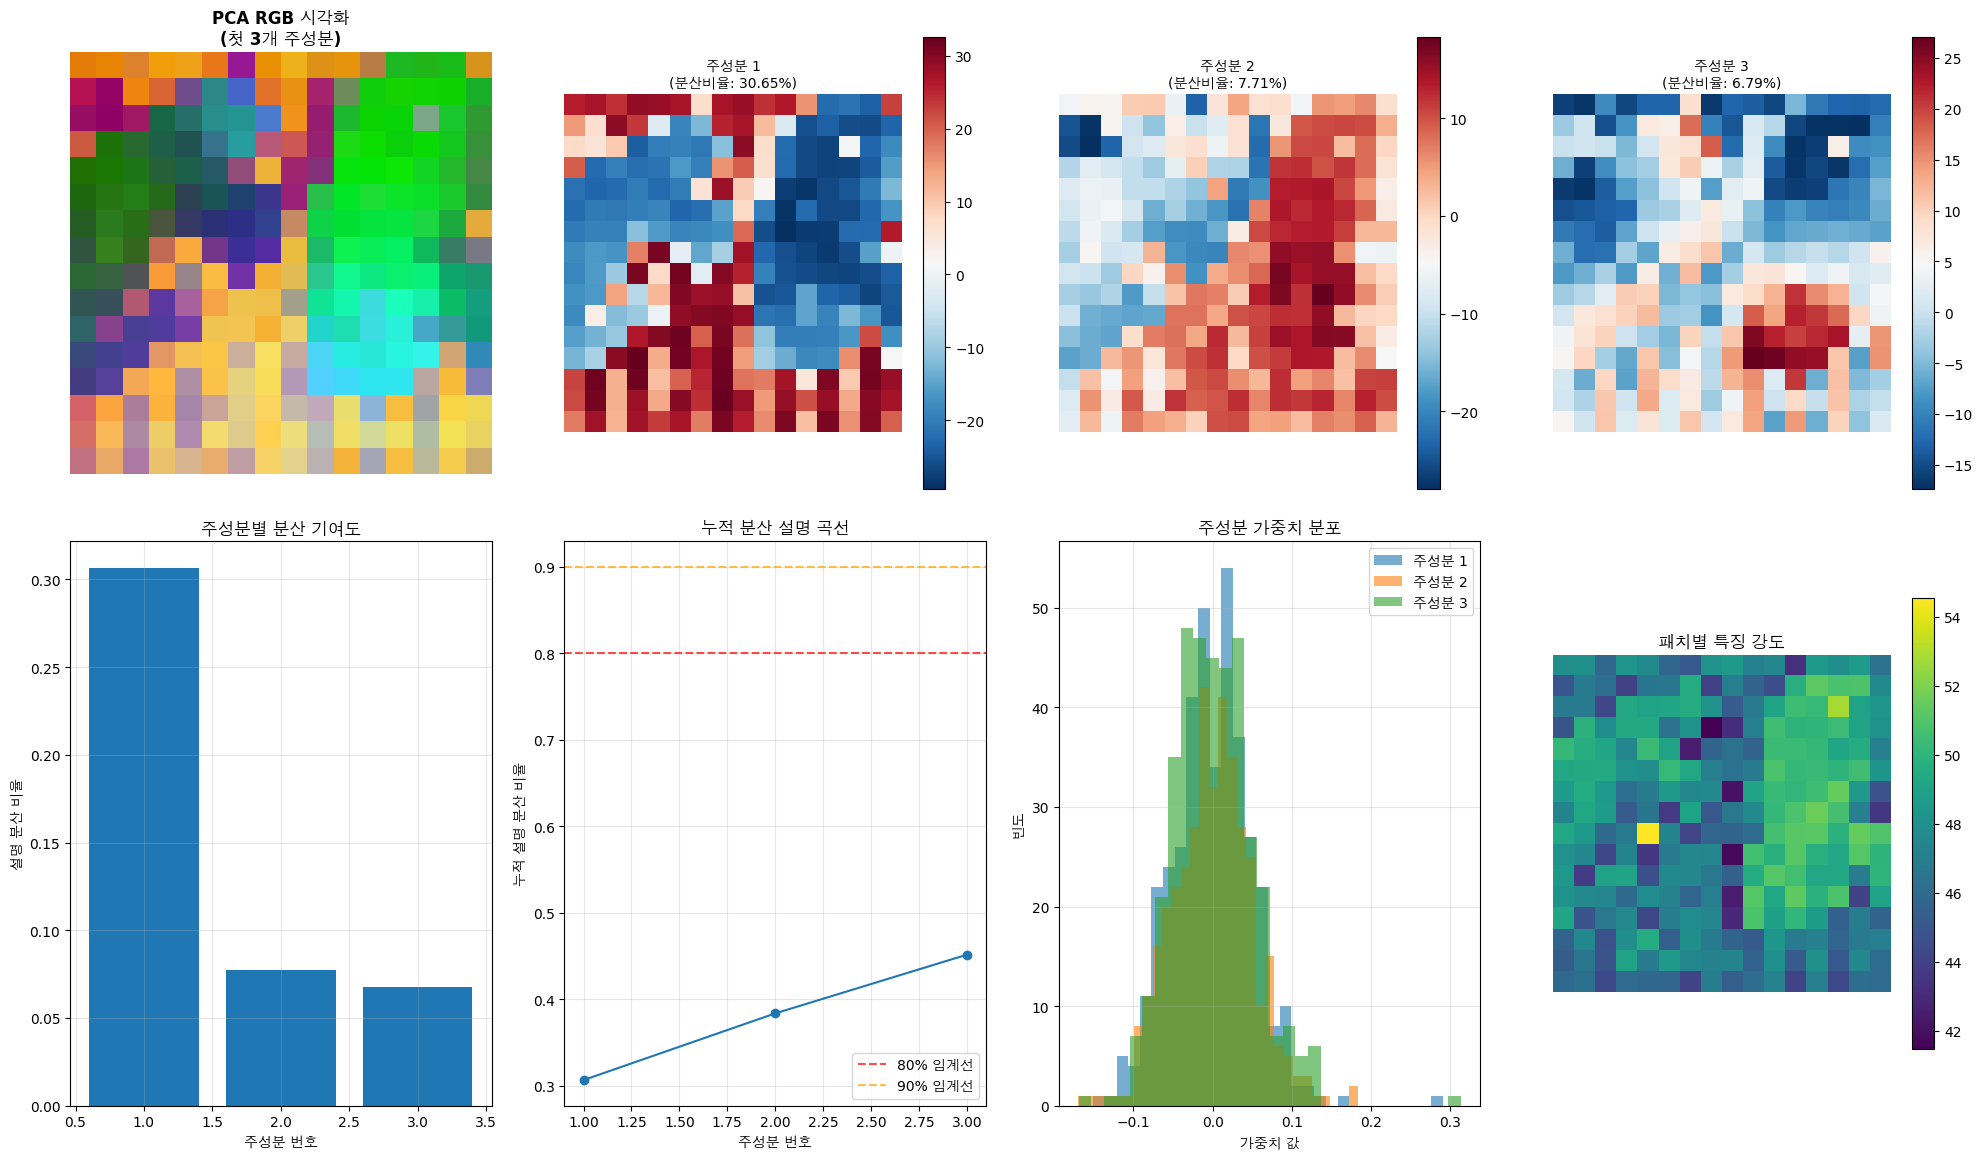


=== 분석 결과 요약 ===
총 설명 분산 비율: 45.14%
주성분_1 설명 분산: 30.65%
주성분_2 설명 분산: 7.71%
주성분_3 설명 분산: 6.79%

전체 특징 복잡도: 높음
차원 축소 효과성: 낮음


In [13]:
# hidden_states: [seq_len, hidden_dim] 또는 [batch_size, seq_len, hidden_dim]
# 예: (197, 384) for ViT-Small, (197, 768) for ViT-Base

pca_rgb, analysis, interpretations = analyze_dinov2_hidden_states(
    hidden_states=last_hidden_states.cpu().detach().numpy(),
    use_background_separation=False,  # 배경 분리 적용
    save_visualization=False              # 결과 저장
)